In [1]:
import numpy as np
import pandas as pd
import mesa
#from mesa.batchrunner import BatchRunner
from model import SocialModel

# Parameters to test
fixed_params = {
    "width": 10,
    "height": 10
}

# Define the variable parameters to test
variable_params = {
    "num_agents": [50, 100, 150],  # Different numbers of agents
    "ai_accuracy": [0.7, 0.85, 0.95],  # Varying AI accuracy
    "ai_bias": [0.0, 0.2, 0.5],  # Varying AI bias
    "network_type": ["Random", "Small World", "Scale-Free"]  # Different network types
}

# Define the model-level data collectors
model_reporters = {
    "Average Belief": lambda m: np.mean([agent.belief for agent in m.schedule.agents if hasattr(agent, "belief")]),
    "AI Bias": lambda m: m.compute_ai_bias(),
    "Average Knowledge": lambda m: np.mean([agent.knowledge for agent in m.schedule.agents if hasattr(agent, "knowledge")]),
    "Average Emotional State": lambda m: np.mean([agent.ES for agent in m.schedule.agents if hasattr(agent, "ES")])
}

# Run batch simulations
batch = mesa.batch_run(
    SocialModel,
    parameters=variable_params,
    #fixed_parameters=fixed_params,
    iterations=1,  # Number of times to run each parameter combination
    max_steps=100,  # Maximum number of steps for each simulation
    data_collection_period = 1,
)

# Execute the batch run
#batch.run_all()


  0%|          | 0/81 [00:00<?, ?it/s]

In [2]:
# Collect the results
each_step_range = pd.DataFrame(batch)

In [3]:
each_step_range.tail()

,RunId,iteration,Step,num_agents,ai_accuracy,ai_bias,network_type,Average Belief,AI Bias,Average Knowledge,Average Emotional State
8176,80,0,96,150,0.95,0.5,Scale-Free,-0.666663,-1.0,85.017276,-0.841574
8177,80,0,97,150,0.95,0.5,Scale-Free,-0.662944,-1.0,84.980990,-0.841873
8178,80,0,98,150,0.95,0.5,Scale-Free,-0.664704,-1.0,85.104950,-0.844414
8179,80,0,99,150,0.95,0.5,Scale-Free,-0.677279,-1.0,85.105657,-0.847617
8180,80,0,100,150,0.95,0.5,Scale-Free,-0.683342,-1.0,84.950815,-0.849891


In [5]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
df = each_step_range

In [7]:
#split data into training and testing sets
X = df[['num_agents', 'ai_accuracy', 'ai_bias', 'network_type']]
Y = df['Average Belief']

In [8]:
#split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6544, 4) (1637, 4) (6544,) (1637,)


In [9]:
#encode categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [10]:
#standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
#train the model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [12]:
#predict the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 0.13204428703487514


In [13]:
#feature importance
feature_importance = model.feature_importances_
print('Feature Importance in predicting belief: in order of num_agents, ai_accuracy, ai bias, network type', feature_importance)

Feature Importance: in order of num_agents, ai_accuracy, ai bias, network type [0.08941022 0.11938122 0.67640562 0.03095602 0.04386869 0.03997823]


In [14]:
#create a loop to do the same thing but test the Average Belief, Average Knowledge, AI Bias, and Average Emotional State
#split data into training and testing sets
X = df[['num_agents', 'ai_accuracy', 'ai_bias', 'network_type']]
Y = df['Average Knowledge']

#split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#encode categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

#standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#train the model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

#predict the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

#feature importance
feature_importance = model.feature_importances_
print('Feature Importance in predicting knowledge: in order of num_agents, ai_accuracy, ai bias, network type', feature_importance)


(6544, 4) (1637, 4) (6544,) (1637,)
MSE: 461.8450806297703
Feature Importance in predicting knowledge: in order of num_agents, ai_accuracy, ai bias, network type [0.04670097 0.01988167 0.8926998  0.00160368 0.01324686 0.02586702]


In [ ]:
#Do the same thing for AI Bias
#split data into training and testing sets
X = df[['num_agents', 'ai_accuracy', 'ai_bias', 'network_type']]
Y = df['AI Bias']

#split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#encode categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

#standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#train the model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

#predict the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

#feature importance
feature_importance = model.feature_importances_
print('Feature Importance in predicting AI Bias: in order of num_agents, ai_accuracy, ai bias, network type', feature_importance)

#Do the same thing for Average Emotional State
#split data into training and testing sets
X = df[['num_agents', 'ai_accuracy', 'ai_bias', 'network_type']]
Y = df['Average Emotional State']

#split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#encode categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

#standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#train the model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

#predict the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

#feature importance
feature_importance = model.feature_importances_
print('Feature Importance in predicting Average Emotional State: in order of num_agents, ai_accuracy, ai bias, network type', feature_importance)


In [21]:
# Create a list of the variables to test
variables = ['Average Belief', 'Average Knowledge', 'AI Bias', 'Average Emotional State']

# Create a list to store the feature importances, only for the variables
list_of_importances = []

# Create a list to store the feature names
feature_names = []

# Loop through the variables
for variable in variables:
    # Split data into training and testing sets
    X = df[['num_agents', 'ai_accuracy', 'ai_bias', 'network_type']]
    Y = df[variable]

    # Split to train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    # Encode categorical variables
    X_train_encoded = pd.get_dummies(X_train)
    X_test_encoded = pd.get_dummies(X_test)

    # Update feature names after encoding
    if len(feature_names) == 0:  # Initialize feature names list only once
        feature_names = list(X_train_encoded.columns)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_encoded)
    X_test_scaled = scaler.transform(X_test_encoded)

    # Train the model
    model = GradientBoostingRegressor()
    model.fit(X_train_scaled, y_train)

    # Predict the test set
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print('MSE:', mse)

    # Feature importance
    feature_importance = model.feature_importances_
    print(f'Feature Importance in predicting {variable}: in order of features', feature_importance)
    # Append the feature importance to the list
    list_of_importances.append(feature_importance)


(6544, 4) (1637, 4) (6544,) (1637,)
MSE: 0.13204428703487514
Feature Importance in predicting Average Belief: in order of features [0.08941022 0.11938122 0.67640562 0.03095602 0.04386869 0.03997823]
(6544, 4) (1637, 4) (6544,) (1637,)
MSE: 461.8450806297703
Feature Importance in predicting Average Knowledge: in order of features [0.04670097 0.01988167 0.8926998  0.00160368 0.01324686 0.02586702]
(6544, 4) (1637, 4) (6544,) (1637,)
MSE: 0.1666809531066905
Feature Importance in predicting AI Bias: in order of features [0.09773411 0.1562902  0.53173422 0.05406363 0.08903478 0.07114307]
(6544, 4) (1637, 4) (6544,) (1637,)
MSE: 0.2968358528829714
Feature Importance in predicting Average Emotional State: in order of features [0.01941384 0.02826922 0.90195488 0.01490538 0.02020072 0.01525597]


In [22]:
# Create a DataFrame to store the feature importances
feature_importances_df = pd.DataFrame(list_of_importances, columns=feature_names)
feature_importances_df['Variable'] = variables
feature_importances_df.set_index('Variable', inplace=True)

print(feature_importances_df)

                         num_agents  ai_accuracy   ai_bias  \
Variable                                                     
Average Belief             0.089410     0.119381  0.676406   
Average Knowledge          0.046701     0.019882  0.892700   
AI Bias                    0.097734     0.156290  0.531734   
Average Emotional State    0.019414     0.028269  0.901955   

                         network_type_Random  network_type_Scale-Free  \
Variable                                                                
Average Belief                      0.030956                 0.043869   
Average Knowledge                   0.001604                 0.013247   
AI Bias                             0.054064                 0.089035   
Average Emotional State             0.014905                 0.020201   

                         network_type_Small World  
Variable                                           
Average Belief                           0.039978  
Average Knowledge               

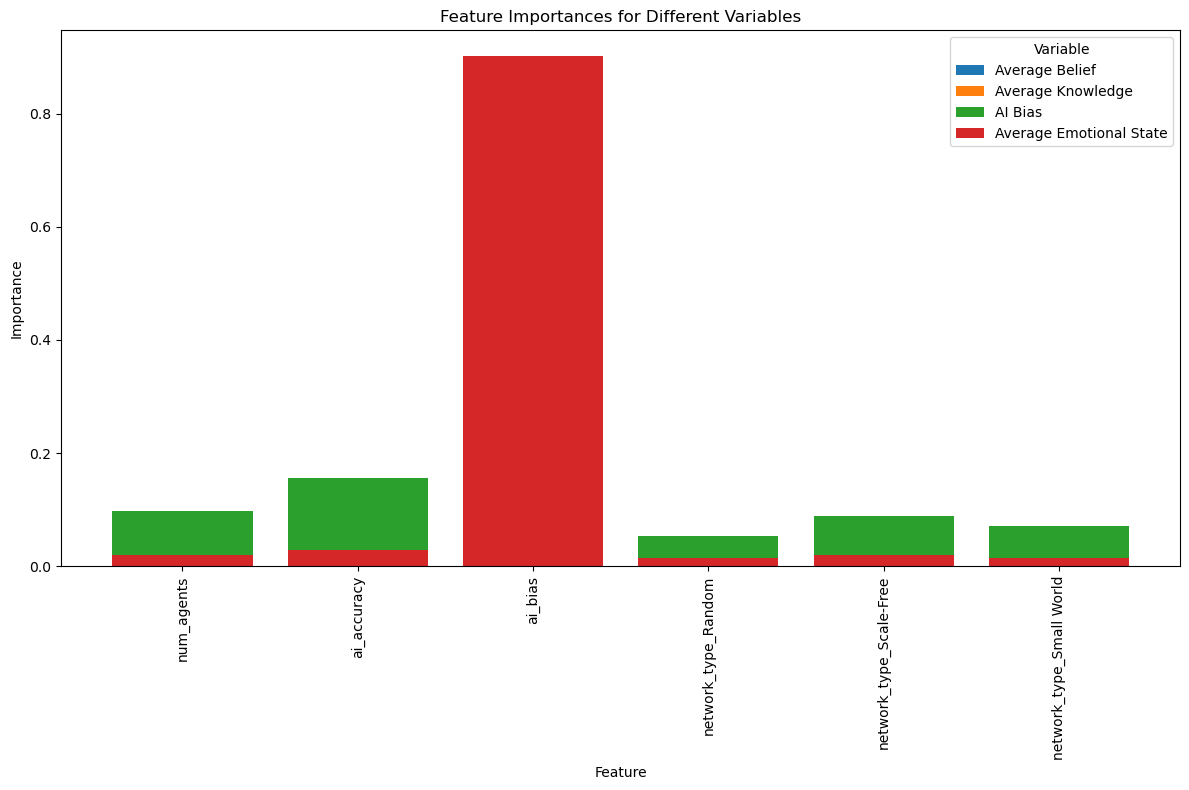

In [23]:
import matplotlib.pyplot as plt

# Melt the DataFrame for easy plotting
importances_melted = feature_importances_df.reset_index().melt(id_vars='Variable', var_name='Feature', value_name='Importance')

# Plotting
plt.figure(figsize=(12, 8))
for variable in variables:
    subset = importances_melted[importances_melted['Variable'] == variable]
    plt.bar(subset['Feature'], subset['Importance'], label=variable)

plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for Different Variables')
plt.xticks(rotation=90)
plt.legend(title='Variable')
plt.tight_layout()
plt.show()


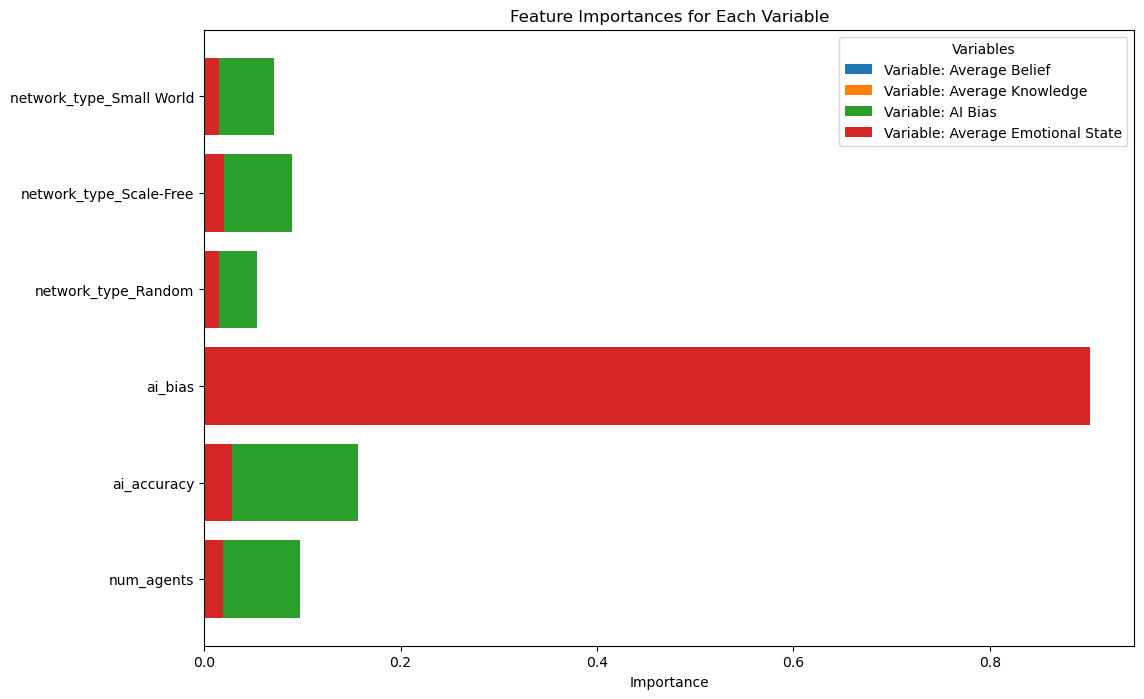

In [24]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(12, 8))
for idx, row in feature_importances_df.iterrows():
    plt.barh(feature_importances_df.columns, row, label=f'Variable: {idx}')
plt.xlabel('Importance')
plt.title('Feature Importances for Each Variable')
plt.legend(title='Variables')
plt.show()


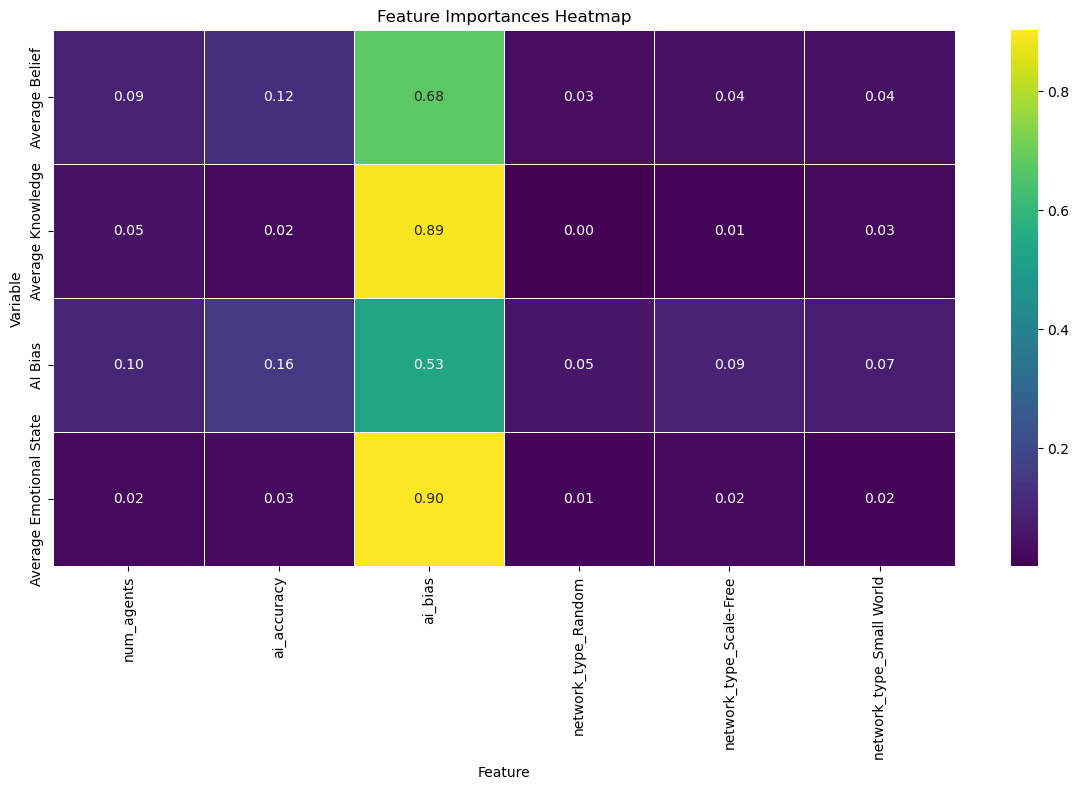

In [25]:
import seaborn as sns

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(feature_importances_df, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Feature Importances Heatmap')
plt.xlabel('Feature')
plt.ylabel('Variable')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


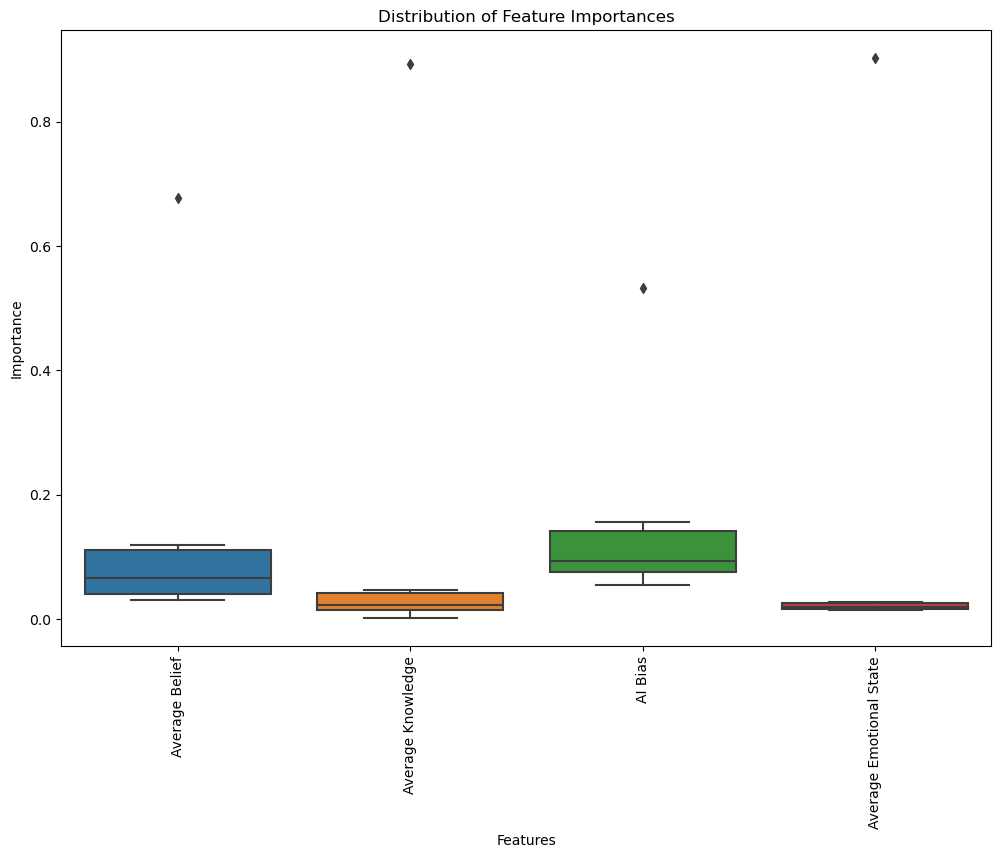

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=feature_importances_df.T)
plt.title('Distribution of Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()


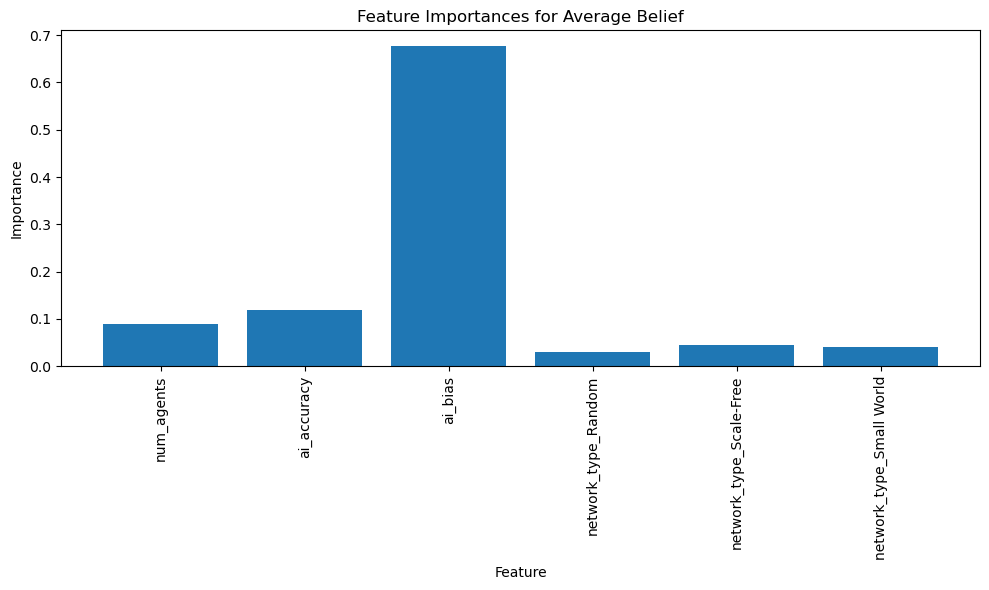

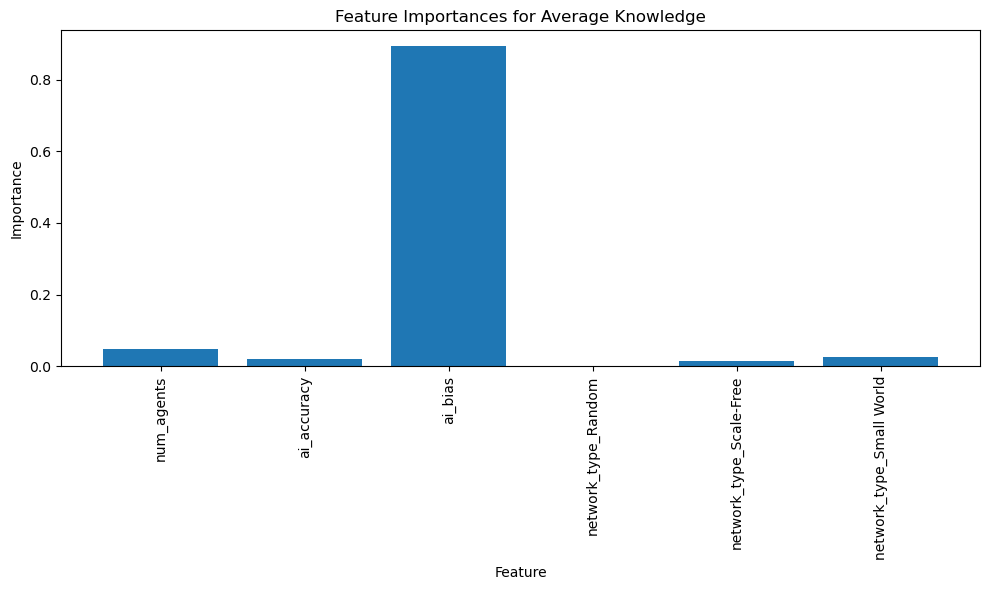

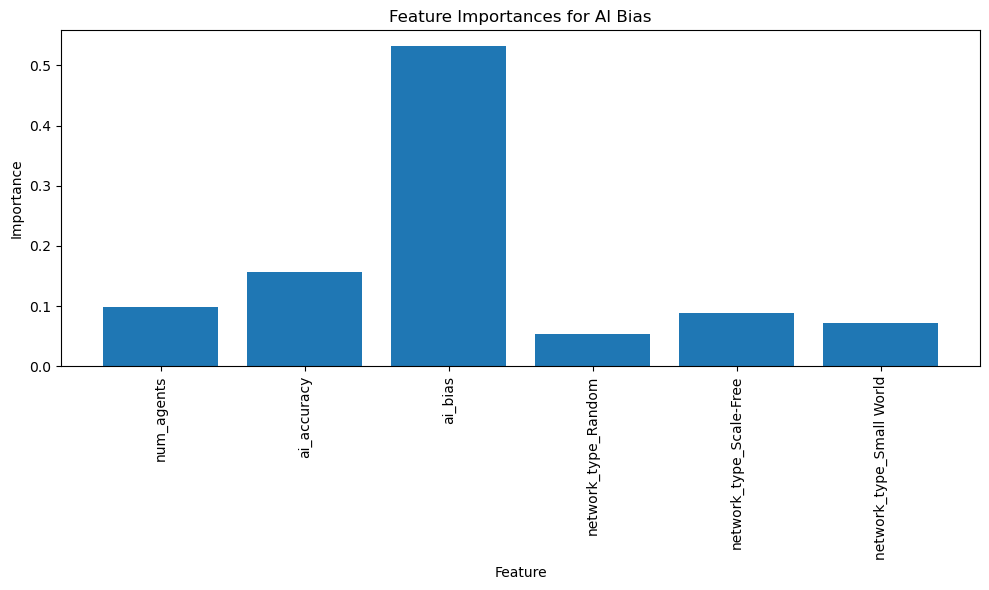

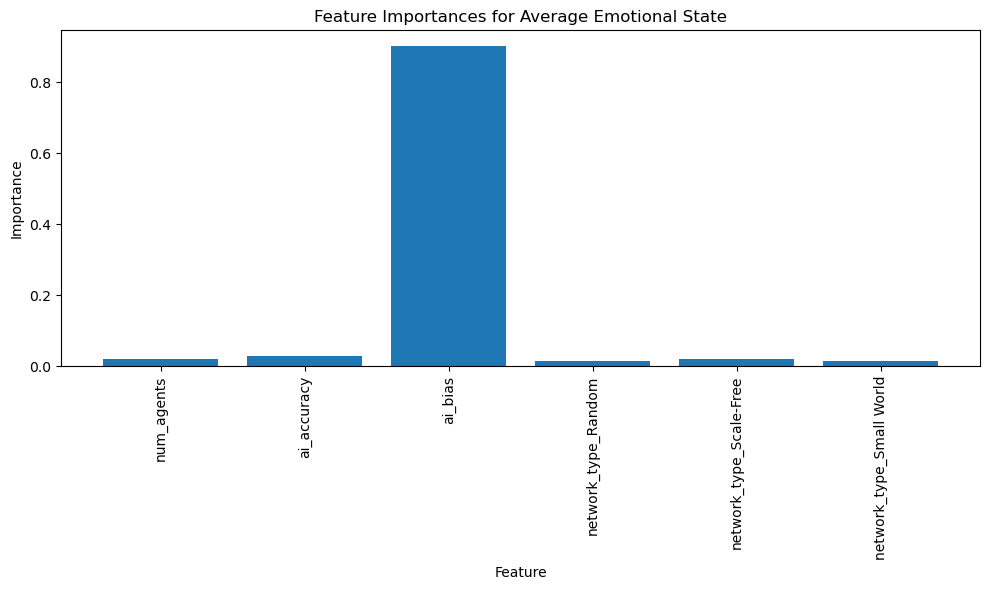

In [27]:
# Plotting feature importance for each variable
for variable in variables:
    plt.figure(figsize=(10, 6))
    subset = importances_melted[importances_melted['Variable'] == variable]
    plt.bar(subset['Feature'], subset['Importance'])
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title(f'Feature Importances for {variable}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


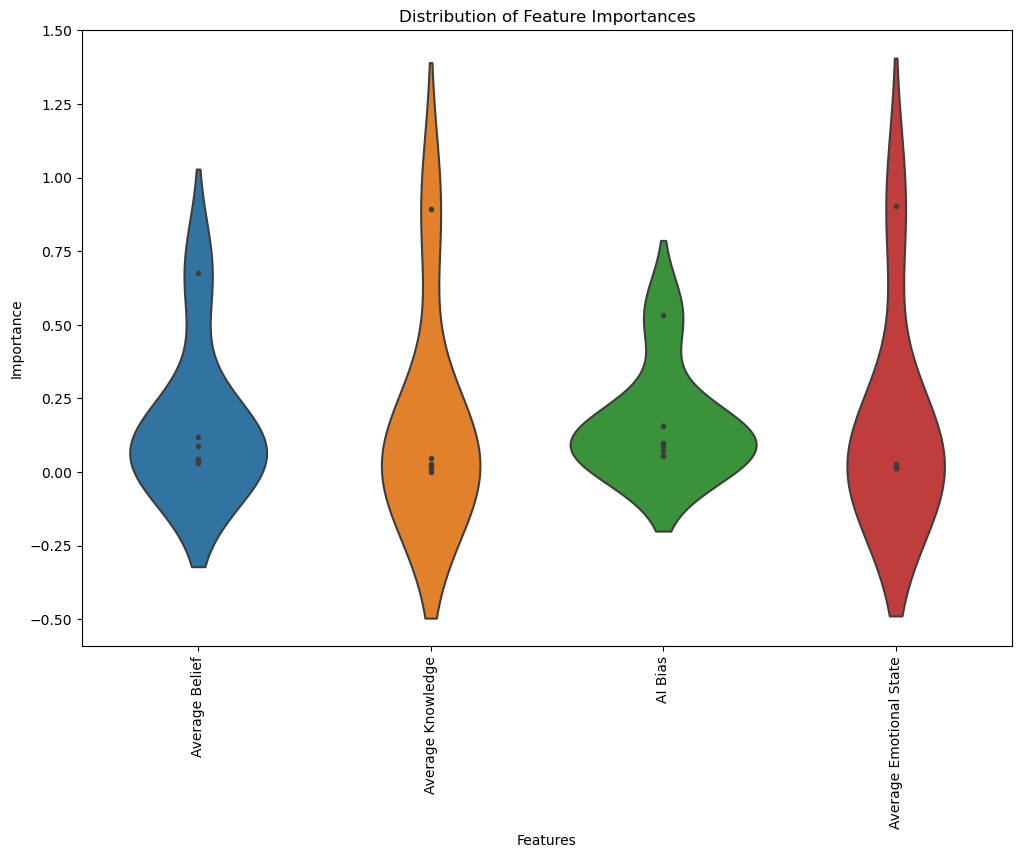

In [29]:
# Create a Violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=feature_importances_df.T, inner='point')
plt.title('Distribution of Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()